In [11]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import os

import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator()

In [4]:
train_images = train_datagen.flow_from_directory(#'C:/Users/sanchit/Desktop/Fingerprint_Dataset/train/',
                                            'C:/Users/sanchit/Desktop/Fingerprint_Dataset/train/',
                                          target_size= (1000,1000),
                                          batch_size = 10,
                                          class_mode = 'categorical',
                                                shuffle = True)
#test_images = train_datagen.flow_from_directory('C:/Users/sanchit/Desktop/Fingerprint_Dataset/test',
                                          #target_size= (1000,1000))
                                          #batch_size = 3,
                                          #class_mode = 'binary')
#print(len(train_images))


Found 874 images belonging to 20 classes.


In [5]:
train_images.class_indices
#test_images.class_indices

{'Anjali': 0,
 'Atharv': 1,
 'Chirayu': 2,
 'Harshad': 3,
 'Kaushik': 4,
 'Manthan': 5,
 'Navya': 6,
 'Omkar': 7,
 'Pranjal': 8,
 'Raman': 9,
 'Raviraj': 10,
 'Rushikesh': 11,
 'Sanchit': 12,
 'Satvik': 13,
 'Shaurya': 14,
 'Shravani': 15,
 'Shrestha': 16,
 'Shriya': 17,
 'Vedang': 18,
 'Vishal': 19}

In [6]:
print(len(train_images.class_indices))
labels = train_images.class_indices.keys()
print(train_images.class_indices.keys())

20
dict_keys(['Anjali', 'Atharv', 'Chirayu', 'Harshad', 'Kaushik', 'Manthan', 'Navya', 'Omkar', 'Pranjal', 'Raman', 'Raviraj', 'Rushikesh', 'Sanchit', 'Satvik', 'Shaurya', 'Shravani', 'Shrestha', 'Shriya', 'Vedang', 'Vishal'])


In [7]:
train_images.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(1000, 1000, 3)))  
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))


#model.summary()



model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))


#model.summary()


#model.add(layers.GlobalMaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(1600))
model.add(layers.Dense(800))
model.add(layers.Dense(400))
model.add(layers.Dense(200))
model.add(layers.Dense(100))
model.add(layers.Dense(50))
#model.add(layers.Dense(25))

# Finally, we add a classification layer.
model.add(layers.Dense(len(train_images.class_indices),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 496, 496, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 165, 165, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 163, 163, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 161, 161, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 32)        9

In [9]:
opt = tf.keras.optimizers.RMSprop()
model.compile(
  optimizer = 'Adam',
  #  optimizer = opt,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [13]:
model.fit(train_images,
    #steps_per_epoch=int(len(train_images)/batch_size),
          steps_per_epoch = 20,
  #to_categorical(train_labels),
  epochs=30
  #validation_data=(test_images, to_categorical(test_labels)),
)

  ...
    to  
  ['...']
Train for 20 steps
Epoch 1/30
20/20 [==============================] - 90s 4s/step - loss: 0.5481 - accuracy: 0.8505
Epoch 2/30
20/20 [==============================] - 92s 5s/step - loss: 0.3572 - accuracy: 0.9050
Epoch 3/30
20/20 [==============================] - 89s 4s/step - loss: 0.3318 - accuracy: 0.9150
Epoch 4/30
20/20 [==============================] - 90s 4s/step - loss: 0.2327 - accuracy: 0.9350
Epoch 5/30
20/20 [==============================] - 94s 5s/step - loss: 0.5239 - accuracy: 0.8750
Epoch 6/30
20/20 [==============================] - 87s 4s/step - loss: 0.4934 - accuracy: 0.8700
Epoch 7/30
20/20 [==============================] - 86s 4s/step - loss: 0.4332 - accuracy: 0.8750
Epoch 8/30
20/20 [==============================] - 86s 4s/step - loss: 0.4124 - accuracy: 0.9000
Epoch 9/30
20/20 [==============================] - 91s 5s/step - loss: 0.4126 - accuracy: 0.8557
Epoch 10/30
20/20 [==============================] - 92s 5s/step - loss: 0

Anjali_1.jpg


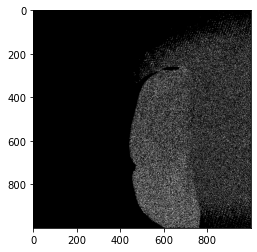

[0]
Anjali

Anjali_2.jpg


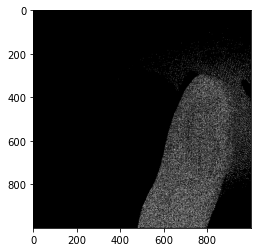

[0]
Anjali

Atharv_1.jpg


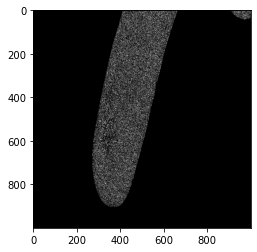

[1]
Atharv

Atharv_2.jpg


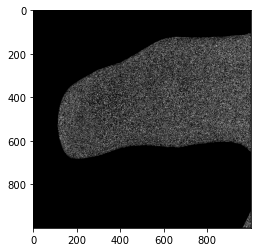

[1]
Atharv

Chirayu_1.jpg


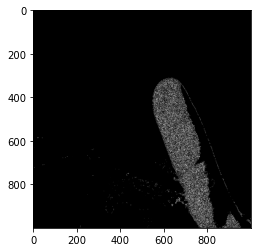

[2]
Chirayu

Chirayu_2.jpg


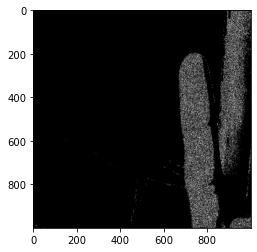

[11]
Rushikesh

Harshad_1.jpg


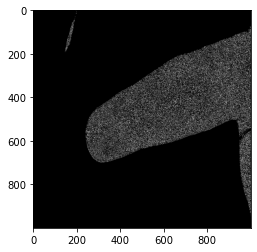

[3]
Harshad

Harshad_2.jpg


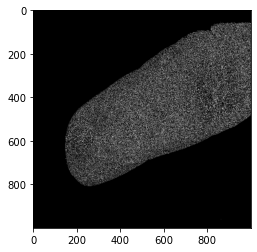

[3]
Harshad

Kaushik_1.jpg


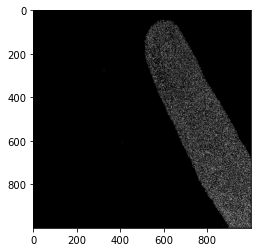

[4]
Kaushik

Kaushik_2.jpg


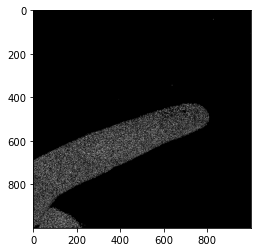

[4]
Kaushik

Manthan_1.jpg


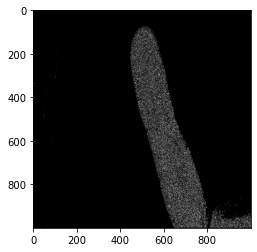

[5]
Manthan

Manthan_2.jpg


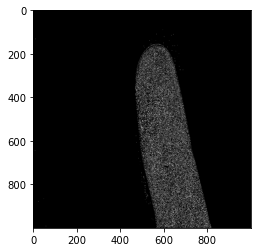

[5]
Manthan

Navya_1.jpg


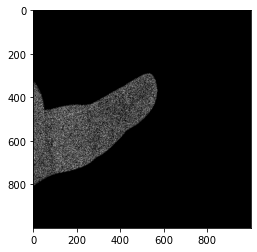

[6]
Navya

Navya_2.jpg


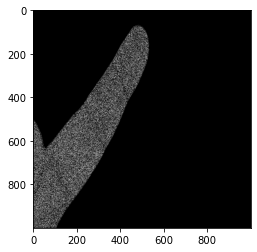

[6]
Navya

Omkar_1.jpg


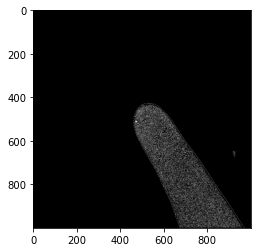

[7]
Omkar

Omkar_2.jpg


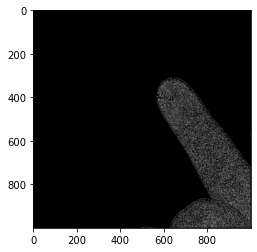

[7]
Omkar

Pranjal_1.jpg


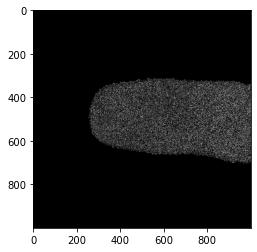

[8]
Pranjal

Pranjal_2.jpg


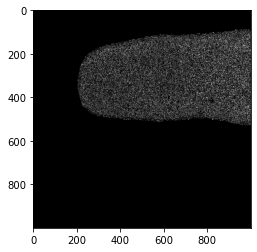

[8]
Pranjal

Raman_1.jpg


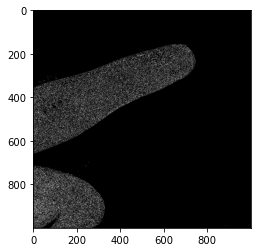

[9]
Raman

Raman_2.jpg


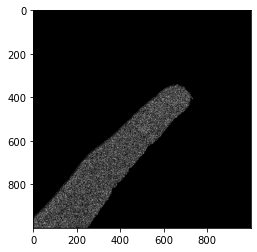

[9]
Raman

Raviraj_1.jpg


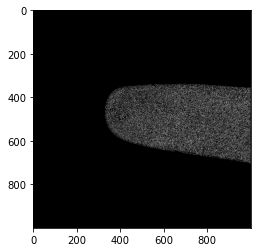

[10]
Raviraj

Raviraj_2.jpg


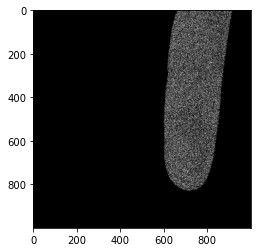

[1]
Atharv

Rushikesh_1.jpg


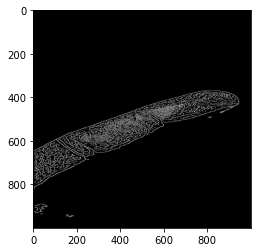

[11]
Rushikesh

Rushikesh_2.jpg


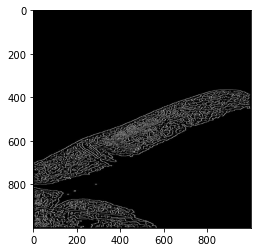

[11]
Rushikesh

Sanchit_1.jpg


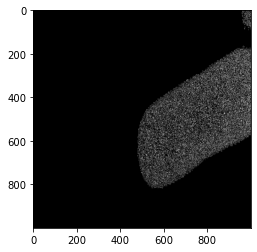

[12]
Sanchit

Sanchit_2.jpg


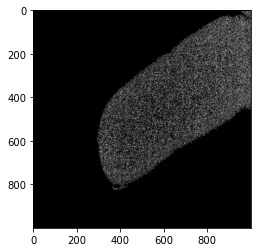

[1]
Atharv

Satvik_1.jpg


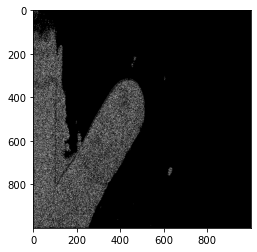

[13]
Satvik

Satvik_2.jpg


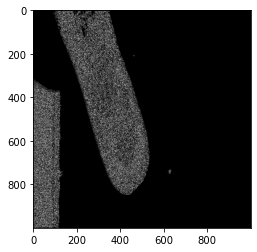

[13]
Satvik

Shaurya_1.JPG


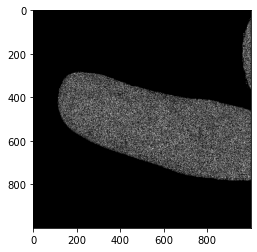

[14]
Shaurya

Shaurya_2.JPG


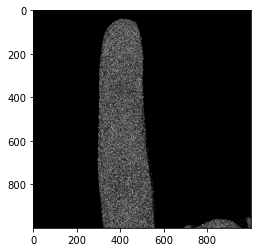

[14]
Shaurya

Shravani_1.jpg


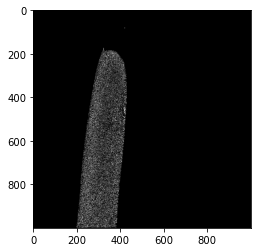

[15]
Shravani

Shravani_2.jpg


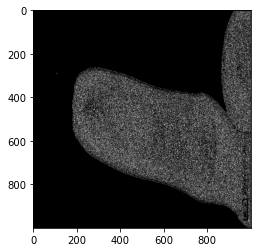

[15]
Shravani

Shrestha_1.jpg


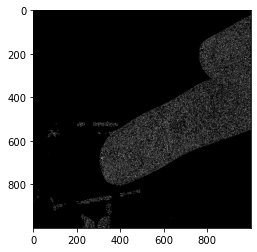

[16]
Shrestha

Shrestha_2.jpg


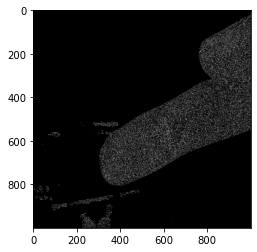

[16]
Shrestha

Shriya_1.jpeg


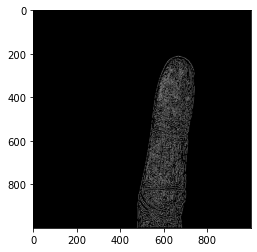

[17]
Shriya

Shriya_2.jpeg


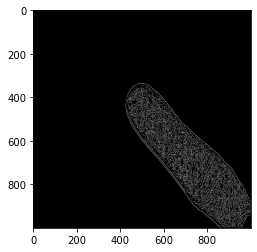

[17]
Shriya

Vedang_1.jpg


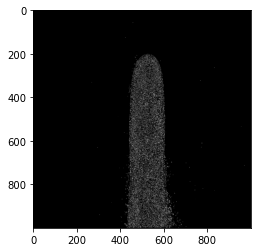

[18]
Vedang

Vedang_2.jpg


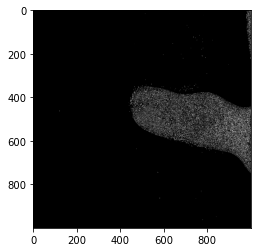

[18]
Vedang

Vishal_1.jpg


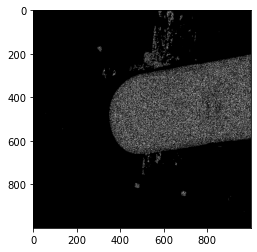

[19]
Vishal

Vishal_2.jpg


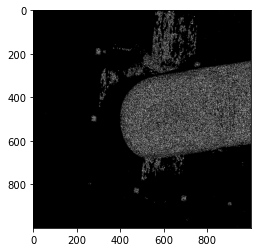

[19]
Vishal



In [16]:
dir_path = 'C:/Users/sanchit/Desktop/Fingerprint_Dataset/test'
#dir_path = 'C:/Users/sanchit/Desktop/Fingerprint_Dataset/OG_test'

for i in os.listdir(dir_path):
    print(i)
    img = image.load_img(dir_path+'//'+i,target_size=(1000,1000))
    #img = img.resize(1000,1000)
    #img = img_to_array(img)
    #img = img.reshape( -1,1000, 1000,3)
    imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    test_images = np.vstack([X])
# Predict on the test images.
    predictions = model.predict(test_images)
    #print(predictions)
    
# Print our model's predictions.
    print(np.argmax(predictions, axis=1)) 
    print(list(labels)[int(np.argmax(predictions, axis=1))])
    print()
